Digit Recognition Model Using Random Forest
Loading MNIST data...
Flattening images...
Creating Random Forest of 100 decision trees...
Training the model with 60,000 examples...
Testing on 10,000 new images...

Final Accuracy: 0.9705 (97.0%)

Let's see some predictions:


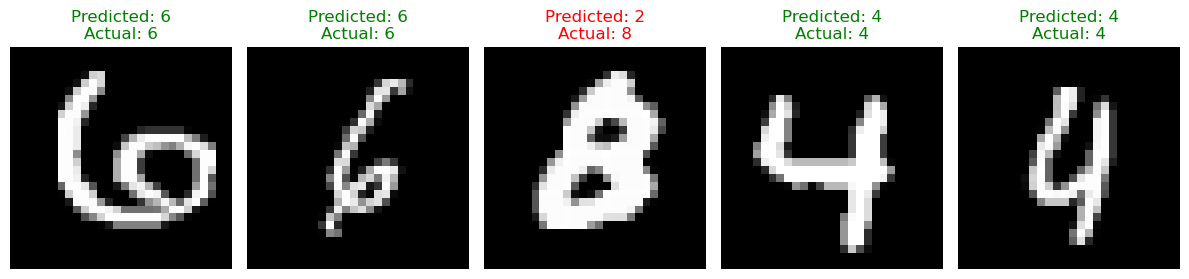


Done! We achieved 97.0% accuracy!


In [10]:
# ABOUT THE PROJECT: This project is a handwritten digit recognition system that uses a Random Forest machine learning model instead of deep learning.
# It takes the MNIST dataset (images of digits 0–9), flattens each 28×28 pixel image into a list of numbers,
# and trains a forest of 100 decision trees to recognize the digits. 
# After training on 60,000 examples, it tests the model on 10,000 new images, calculates the accuracy, 
# and displays some predictions along with whether they were correct or wrong.

import numpy as np 
# Numerical Python(NumPy) is a fundamental library for scientific computing in Python, NumPy's main feature is ndarray(n-dimensional array) object.

%matplotlib inline # %matplotlib inline is a Jupyter notebook magic command that makes plots display directly inside the notebook cells.

import matplotlib.pyplot as plt 
# Matplotlib is Python's most popular library for creating static, animated, and interactive visualizations. 
# Pyplot (usually imported as plt) is a specific module within matplotlib that provides a MATLAB-like interface for plotting graphs and images.

from sklearn.ensemble import RandomForestClassifier 
# Scikit-learn (sklearn) is Python's most popular machine learning library. 
# It provides simple and efficient tools for data analysis, machine learning, and predictive modeling.
# It's built on NumPy, SciPy, and matplotlib, making it well-integrated with the scientific Python ecosystem.
# sklearn.ensemble is a specific module within scikit-learn that contains...
# "ensemble methods" - algorithms that combine multiple simpler models to create a stronger predictor.
# The idea is that multiple "weak" learners working together can often outperform a single "strong" learner.
# RandomForestClassifier is a specific ensemble algorithm that creates a "forest" of decision trees and combines their predictions. 
#  Random Forest is basically a type of "supervised machine learning algorithm" made of multiple decision trees.


from sklearn.metrics import accuracy_score
# sklearn.metrics is a module within scikit-learn that provides various functions to evaluate the performance of machine learning models.
# It contains metrics for classification, regression, clustering, and other machine learning tasks.
# For classification metrics it provides accuracy, precision, recall, F1-score, confusion matrix

import tensorflow as tf
# Classification metrics: accuracy, precision, recall, F1-score, confusion matrix.
# TensorFlow provides a comprehensive ecosystem for numerical computation and machine learning,
# with a particular focus on deep learning (neural networks with multiple layers).

print("Digit Recognition Model Using Random Forest")

print("Loading MNIST data...")
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data() # code for loading the MNIST dataset
# tensorflow.keras.datasets.mnist gives a ready-to-use digit dataset without having to download manually, it returns images as NumPy arrays.
# MNIST stands for Modified National Institute of Standards and Technology.
# MNIST provides 70,000 images of handwritten digits (0–9), each 28×28 pixels in grayscale.

# (x_train, y_train) represents Training Data (The examples from which the model learns)
# (x_test, y_test) represents Testing Data (The new, unseen examples for checking accuracy)

# x_train and x_test contains the actual images of handwritten digits
# Each image is a 28x28 pixel array
# These are the features (the raw data our model will learn from)
# Shape: (number_of_samples, 28, 28)

# y_train and y_test contains the correct labels for each image
# Simply numbers 0, 1, 2, 3, 4, 5, 6, 7, 8, or 9
# These are basically the targets (what we want our model to predict)
# Shape: (number_of_samples,)


print("Flattening images...") # Flattening the images i.e turning each 28×28 image into one row of 784 numbers (features).
x_train_flat = x_train.reshape(60000, 784)  # reshaping 60k training images, original shape: (60000, 28, 28) i.e 60k images, each 28×28 pixels.
x_test_flat = x_test.reshape(10000, 784)    # reshaping 10k test images, original shape: (10000, 28, 28) i.e 10k images, each 28×28 pixels.
# We flatten the images because Random Forest models don’t directly work with 2D image arrays, they need a feature vector.

# Creating Random Forest
print("Creating Random Forest of 100 decision trees...")
model = RandomForestClassifier(
    n_estimators=100,    # 100 trees 
    random_state=42      # Fixes randomness so we get the same results every time (reproducibility).
)

# Training the model i.e showing it lots of examples
print("Training the model with 60,000 examples... (just wait for a minute or two)")
model.fit(x_train_flat, y_train) # Model sees the image (input) + correct digit (label), 
# because Random Forests require both features (flattened pixels) and labels to learn patterns (Supervised Learning).


# Testing how well the model learned
print("Testing on 10,000 new images...")
predictions = model.predict(x_test_flat) # predict() is a method that asks a trained machine learning model to make predictions on new, unseen data.
# Testing data was never shown during training which ensures a fair accuracy check.

# Calculating accuracy of the trained and tested ML model
accuracy = accuracy_score(y_test, predictions)
print(f"\nFinal Accuracy: {accuracy:.4f} ({accuracy*100:.1f}%)")

# Showing some predictions
print("\nLet's see some predictions:")
fig, axes = plt.subplots(1, 5, figsize=(12, 3)) # plt.subplots() is a fuction usesd to create a figure with 1 row and 5 columns of subplots, sized 12x3 inches

for i in range(5):
    # Picks a random image
    idx = np.random.randint(0, 1000) # np.random.randint() is a function that generates a random integer between 0 and 999
    
    # Shows the image
    axes[i].imshow(x_test[idx], cmap='gray') # axes[i].imshow() is a method to display an image from x_test at index idx using grayscale colors
    
    # Shows what model predicted vs actual answer
    predicted = predictions[idx] # Gets the model's prediction for the sample at index idx
    actual = y_test[idx] # Gets the true label for the sample at index idx
    
    # Color: green if correct, red if wrong
    color = 'green' if predicted == actual else 'red'
    
    axes[i].set_title(f'Predicted: {predicted}\nActual: {actual}', color=color)
    # axes[i].set_title() is a method that sets the subplot title showing predicted vs actual values in the chosen color

    axes[i].axis('off') # axes[i].axis() is a method to hide the x and y axis ticks and labels for cleaner appearance

plt.tight_layout() # plt.tight_layout() is a function that automatically adjusts spacing between subplots to prevent overlapping
plt.show() # plt.show() is a function that displays the completed plot/figure on screen

print(f"\nDone! We achieved {accuracy*100:.1f}% accuracy!")

# ................................................................X..................................................................................

# CLEAN CODES IN COMMENTS BELOW WITHOUT EXTRA COMMENTS
# import numpy as np 
# import matplotlib.pyplot as plt
# from sklearn.ensemble import RandomForestClassifier 
# from sklearn.metrics import accuracy_score
# import tensorflow as tf
# print("Digit Recognition Model Using Random Forest")
# print("Loading MNIST data...")
# (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
# print("Flattening images...")
# x_train_flat = x_train.reshape(60000, 784)
# x_test_flat = x_test.reshape(10000, 784)
# print("Creating Random Forest of 100 decision trees...")
# model = RandomForestClassifier (
#     n_estimators=100,
#     random_state=42 
# )
# print("Training the model with 60,000 examples...")
# model.fit(x_train_flat, y_train)
# print("Testing on 10,000 new images...")
# predictions = model.predict(x_test_flat)
# accuracy = accuracy_score(y_test, predictions)
# print(f"\nFinal Accuracy: {accuracy:.4f} ({accuracy*100:.1f}%)")
# print("\nLet's see some predictions:")
# fig, axes = plt.subplots(1, 5, figsize=(12, 3))
# for i in range(5):
#    idx = np.random.randint(0, 1000)
#    axes[i].imshow(x_test[idx], cmap='gray')
#    predicted = predictions[idx]
#    actual = y_test[idx]
#    color = 'green' if predicted == actual else 'red'
#    axes[i].set_title(f'Predicted: {predicted}\nActual: {actual}', color=color)
#    axes[i].axis('off')
# plt.tight_layout()
# plt.show()
# print(f"\nDone! We achieved {accuracy*100:.1f}% accuracy!")